# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import owm_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={owm_api_key}&units={units}&q="

In [6]:
import pprint

In [7]:
print(cities)

['callaway', 'provideniya', 'kodiak', 'ushuaia', 'college', 'taolanaro', 'nanortalik', 'tiksi', 'carnarvon', 'butaritari', 'taupo', 'hasaki', 'westport', 'port alfred', 'keuruu', 'ilulissat', 'turtas', 'nizhneyansk', 'deputatskiy', 'lebu', 'bambous virieux', 'hakui', 'tyret pervaya', 'jamestown', 'punta arenas', 'iqaluit', 'sitka', 'kavieng', 'albany', 'georgetown', 'mar del plata', 'chuy', 'ust-nera', 'qui nhon', 'san patricio', 'barrow', 'agoura hills', 'vaini', 'utiroa', 'saurimo', 'bredasdorp', 'formoso do araguaia', 'mataura', 'te anau', 'ribeira grande', 'grindavik', 'bowen', 'tasiilaq', 'nuuk', 'talcahuano', 'chokurdakh', 'thompson', 'saldanha', 'alofi', 'tricase', 'ponta do sol', 'ahipara', 'saskylakh', 'labuhan', 'kaeo', 'xinmin', 'lucapa', 'flin flon', 'loharu', 'yellowknife', 'aklavik', 'harnosand', 'luderitz', 'hamilton', 'bluff', 'rikitea', 'cidreira', 'barraute', 'tarko-sale', 'guerrero negro', 'atuona', 'barentsburg', 'severo-kurilsk', 'bethel', 'sabzevar', 'goianesia', 

In [8]:
city_list =[]
country =[]
cloudiness =[]
lat=[]
lng=[]
humidity=[]
max_temp=[]
windspeed=[]

In [10]:
for city in cities:
    try:
        response= requests.get(query_url + city)
        response_json = response.json()
        lattitude=response_json['coord']['lat']
        lat.append(lattitude)
        temperature=response_json['main']['temp_max']
        max_temp.append(temperature)
        clouds=response_json['clouds']['all']
        cloudiness.append(clouds)
        humid=response_json['main']['humidity']
        humidity.append(humid)
        wind=response_json['wind']['speed']
        windspeed.append(wind)
        ctry=response_json['sys']['country']
        country.append(ctry)
        city_name=response_json['name']
        city_list.append(city_name)
        print(f'The city is : {city}, the lattitude is {lattitude}, the temperature is {temperature}, the cloudiness is {clouds}, the humidity is {humid}, the windspeed is {wind}')
    except (KeyError, IndexError):
        print("City not found... skipping.")


The city is : callaway, the lattitude is 46.98, the temperature is 30, the cloudiness is 1, the humidity is 36, the windspeed is 4.1
The city is : provideniya, the lattitude is 64.42, the temperature is 12, the cloudiness is 90, the humidity is 87, the windspeed is 6
The city is : kodiak, the lattitude is 39.95, the temperature is 29, the cloudiness is 1, the humidity is 54, the windspeed is 6.2
The city is : ushuaia, the lattitude is -54.81, the temperature is 0, the cloudiness is 75, the humidity is 79, the windspeed is 2.6
The city is : college, the lattitude is 64.86, the temperature is 24.44, the cloudiness is 1, the humidity is 20, the windspeed is 0.97
City not found... skipping.
The city is : nanortalik, the lattitude is 60.14, the temperature is 4.35, the cloudiness is 100, the humidity is 99, the windspeed is 3.67
The city is : tiksi, the lattitude is 71.64, the temperature is 17.25, the cloudiness is 0, the humidity is 55, the windspeed is 4.16
The city is : carnarvon, the l

The city is : aklavik, the lattitude is 68.22, the temperature is 12, the cloudiness is 40, the humidity is 54, the windspeed is 2.6
The city is : harnosand, the lattitude is 62.63, the temperature is 14.44, the cloudiness is 44, the humidity is 50, the windspeed is 6.2
The city is : luderitz, the lattitude is -26.65, the temperature is 10, the cloudiness is 0, the humidity is 93, the windspeed is 0.5
The city is : hamilton, the lattitude is 43.26, the temperature is 28.89, the cloudiness is 75, the humidity is 45, the windspeed is 6.7
The city is : bluff, the lattitude is -23.58, the temperature is 14.35, the cloudiness is 0, the humidity is 88, the windspeed is 6.75
The city is : rikitea, the lattitude is -23.12, the temperature is 23.45, the cloudiness is 64, the humidity is 81, the windspeed is 4.5
The city is : cidreira, the lattitude is -30.17, the temperature is 9.15, the cloudiness is 33, the humidity is 56, the windspeed is 1.6
The city is : barraute, the lattitude is 48.43, t

The city is : det udom, the lattitude is 14.9, the temperature is 28, the cloudiness is 0, the humidity is 78, the windspeed is 4.6
The city is : tolaga bay, the lattitude is -38.37, the temperature is 5.95, the cloudiness is 3, the humidity is 88, the windspeed is 0.79
The city is : pacific grove, the lattitude is 36.62, the temperature is 26.67, the cloudiness is 20, the humidity is 63, the windspeed is 4.1
The city is : nyurba, the lattitude is 63.29, the temperature is 17.75, the cloudiness is 37, the humidity is 75, the windspeed is 0.86
The city is : geraldton, the lattitude is 49.72, the temperature is 24, the cloudiness is 40, the humidity is 44, the windspeed is 7.7
The city is : ranong, the lattitude is 9.96, the temperature is 25, the cloudiness is 40, the humidity is 100, the windspeed is 9.58
The city is : chipinge, the lattitude is -20.19, the temperature is 15.55, the cloudiness is 98, the humidity is 68, the windspeed is 0.98
The city is : ust-tsilma, the lattitude is 6

The city is : klaksvik, the lattitude is 62.23, the temperature is 10, the cloudiness is 33, the humidity is 93, the windspeed is 1.5
The city is : werda, the lattitude is -25.27, the temperature is 14.75, the cloudiness is 59, the humidity is 36, the windspeed is 4.08
The city is : kavaratti, the lattitude is 10.57, the temperature is 28.55, the cloudiness is 100, the humidity is 77, the windspeed is 7.58
The city is : caravelas, the lattitude is -17.73, the temperature is 24.65, the cloudiness is 100, the humidity is 77, the windspeed is 3.89
The city is : torbay, the lattitude is 47.66, the temperature is 15.56, the cloudiness is 20, the humidity is 62, the windspeed is 4.6
The city is : kaniama, the lattitude is -7.57, the temperature is 20.75, the cloudiness is 0, the humidity is 40, the windspeed is 1.98
The city is : kuryk, the lattitude is 43.18, the temperature is 28.05, the cloudiness is 100, the humidity is 45, the windspeed is 4.94
The city is : axim, the lattitude is 4.87,

The city is : sukabumi, the lattitude is -6.92, the temperature is 23.33, the cloudiness is 8, the humidity is 24, the windspeed is 2.84
The city is : hithadhoo, the lattitude is -0.6, the temperature is 28.95, the cloudiness is 61, the humidity is 74, the windspeed is 4.62
The city is : salihorsk, the lattitude is 52.79, the temperature is 20.95, the cloudiness is 100, the humidity is 95, the windspeed is 4.76
The city is : kerchevskiy, the lattitude is 59.95, the temperature is 8.25, the cloudiness is 21, the humidity is 74, the windspeed is 1.52
The city is : maharajganj, the lattitude is 26.11, the temperature is 33.25, the cloudiness is 92, the humidity is 54, the windspeed is 5.78
The city is : tigil, the lattitude is 57.8, the temperature is 12.85, the cloudiness is 65, the humidity is 73, the windspeed is 3.24
The city is : diffa, the lattitude is 13.32, the temperature is 32.45, the cloudiness is 100, the humidity is 39, the windspeed is 4.21
The city is : pavilosta, the latti

The city is : henties bay, the lattitude is -22.12, the temperature is 12.78, the cloudiness is 61, the humidity is 94, the windspeed is 0.89
City not found... skipping.
The city is : tam ky, the lattitude is 15.57, the temperature is 29, the cloudiness is 0, the humidity is 74, the windspeed is 1.92
The city is : salalah, the lattitude is 17.01, the temperature is 28, the cloudiness is 90, the humidity is 94, the windspeed is 3.6
The city is : viramgam, the lattitude is 23.12, the temperature is 29, the cloudiness is 40, the humidity is 79, the windspeed is 3.1
The city is : kruisfontein, the lattitude is -34, the temperature is 12.45, the cloudiness is 39, the humidity is 94, the windspeed is 2.52
The city is : puerto del rosario, the lattitude is 28.5, the temperature is 23, the cloudiness is 20, the humidity is 60, the windspeed is 7.7
The city is : alpena, the lattitude is 45.06, the temperature is 27.78, the cloudiness is 75, the humidity is 36, the windspeed is 4.1
The city is :

The city is : araouane, the lattitude is 18.9, the temperature is 39.65, the cloudiness is 0, the humidity is 6, the windspeed is 3.73
The city is : sawakin, the lattitude is 19.1, the temperature is 28.45, the cloudiness is 0, the humidity is 25, the windspeed is 0.95
The city is : vallenar, the lattitude is -28.58, the temperature is 17.05, the cloudiness is 0, the humidity is 44, the windspeed is 1.75
The city is : piotrkow trybunalski, the lattitude is 51.41, the temperature is 28.33, the cloudiness is 0, the humidity is 54, the windspeed is 3.1
The city is : dicabisagan, the lattitude is 17.08, the temperature is 23.75, the cloudiness is 98, the humidity is 93, the windspeed is 1.53
The city is : mount gambier, the lattitude is -37.83, the temperature is 9, the cloudiness is 33, the humidity is 87, the windspeed is 4.1
The city is : gornyy, the lattitude is 51.76, the temperature is 13.55, the cloudiness is 70, the humidity is 77, the windspeed is 1.94
The city is : sibolga, the l

The city is : tekirdag, the lattitude is 40.98, the temperature is 24, the cloudiness is 20, the humidity is 88, the windspeed is 7.2
City not found... skipping.
The city is : turukhansk, the lattitude is 65.8, the temperature is 8.45, the cloudiness is 100, the humidity is 91, the windspeed is 6.09
The city is : hambantota, the lattitude is 6.12, the temperature is 26, the cloudiness is 75, the humidity is 100, the windspeed is 2.6
The city is : dalbandin, the lattitude is 28.9, the temperature is 28.65, the cloudiness is 0, the humidity is 7, the windspeed is 6.46
The city is : nemuro, the lattitude is 43.32, the temperature is 11.15, the cloudiness is 79, the humidity is 92, the windspeed is 1.63
The city is : pangai, the lattitude is -19.8, the temperature is 24, the cloudiness is 40, the humidity is 83, the windspeed is 4.6
The city is : anage, the lattitude is -14.61, the temperature is 21, the cloudiness is 75, the humidity is 73, the windspeed is 2.6
The city is : kungurtug, th

The city is : marshall, the lattitude is 39.12, the temperature is 31.67, the cloudiness is 1, the humidity is 58, the windspeed is 3.1
The city is : zharkent, the lattitude is 44.17, the temperature is 10.55, the cloudiness is 0, the humidity is 57, the windspeed is 1.39
The city is : inuvik, the lattitude is 68.36, the temperature is 12, the cloudiness is 75, the humidity is 50, the windspeed is 5.7
The city is : nanning, the lattitude is 22.83, the temperature is 28, the cloudiness is 100, the humidity is 88, the windspeed is 1
City not found... skipping.
The city is : adrar, the lattitude is 27.87, the temperature is 40, the cloudiness is 0, the humidity is 8, the windspeed is 3.1
The city is : aksu, the lattitude is 52.04, the temperature is 17, the cloudiness is 0, the humidity is 93, the windspeed is 4
The city is : changde, the lattitude is 29.04, the temperature is 22.85, the cloudiness is 76, the humidity is 87, the windspeed is 0.55
The city is : khilok, the lattitude is 51.

The city is : verkhoyansk, the lattitude is 67.55, the temperature is 21.85, the cloudiness is 0, the humidity is 35, the windspeed is 0.55
The city is : ruwi, the lattitude is 23.6, the temperature is 32, the cloudiness is 0, the humidity is 79, the windspeed is 2.6
The city is : saint-augustin, the lattitude is 45.63, the temperature is 28.33, the cloudiness is 20, the humidity is 51, the windspeed is 5.1
The city is : leticia, the lattitude is -4.21, the temperature is 29, the cloudiness is 75, the humidity is 83, the windspeed is 1.5
The city is : sinop, the lattitude is 42.03, the temperature is 22.55, the cloudiness is 0, the humidity is 88, the windspeed is 2.5
City not found... skipping.
The city is : roma, the lattitude is 41.89, the temperature is 28.33, the cloudiness is 0, the humidity is 57, the windspeed is 2.1
The city is : christchurch, the lattitude is -43.53, the temperature is 4.44, the cloudiness is 16, the humidity is 100, the windspeed is 1.5
City not found... ski

In [11]:
print(response_json)

{'coord': {'lon': 78.7, 'lat': 67.47}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 4.95, 'pressure': 1011.86, 'humidity': 72, 'temp_min': 4.95, 'temp_max': 4.95, 'sea_level': 1011.86, 'grnd_level': 1009.97}, 'wind': {'speed': 4.14, 'deg': 5.604}, 'clouds': {'all': 100}, 'dt': 1561584491, 'sys': {'message': 0.0092, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'timezone': 18000, 'id': 1489853, 'name': 'Tazovskiy', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#Create new Df
weather_df = ({'City': city,
              'Country': country,
              'Lattitude': lat,
              'Max Temperature': max_temp,
              'Cloudiness': cloudiness,
              'Humidity': humidity,
              'Windspeed':windspeed})
print(weather_df)

{'City': 'tazovskiy', 'Country': ['US', 'US', 'RU', 'US', 'AR', 'US', 'GL', 'RU', 'ZA', 'KI', 'NZ', 'JP', 'US', 'ZA', 'FI', 'GL', 'RU', 'RU', 'ET', 'MU', 'JP', 'RU', 'AU', 'CL', 'CA', 'US', 'PG', 'US', 'GY', 'AR', 'UY', 'RU', 'PY', 'AR', 'US', 'IN', 'AO', 'ZA', 'NZ', 'NZ', 'PT', 'IS', 'AU', 'GL', 'GL', 'CL', 'RU', 'CA', 'PT', 'NU', 'IT', 'BR', 'NZ', 'RU', 'ID', 'NZ', 'CN', 'AO', 'CA', 'IN', 'CA', 'CA', 'SE', 'NA', 'CA', 'AU', 'PF', 'BR', 'CA', 'RU', 'MX', 'PF', 'RU', 'US', 'IR', 'BR', 'ZA', 'HT', 'NZ', 'CA', 'CA', 'AU', 'RU', 'CK', 'CA', 'IS', 'AU', 'NO', 'CA', 'US', 'GR', 'MX', 'CN', 'CN', 'RU', 'JP', 'US', 'NZ', 'VU', 'SA', 'CY', 'BR', 'BR', 'US', 'CN', 'AU', 'CA', 'RU', 'CA', 'CN', 'IN', 'MX', 'RU', 'BR', 'TZ', 'GB', 'IR', 'NZ', 'GF', 'PH', 'NO', 'TH', 'NZ', 'US', 'RU', 'CA', 'TH', 'ZW', 'RU', 'BR', 'ID', 'AU', 'EG', 'RU', 'US', 'AU', 'CL', 'AU', 'RU', 'US', 'EC', 'US', 'RU', 'EC', 'MT', 'AU', 'AU', 'US', 'IN', 'VE', 'US', 'CO', 'ZA', 'CA', 'PE', 'AU', 'AU', 'GF', 'SD', 'AU', 'HN', 

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Lattitude vs Max Temperature')

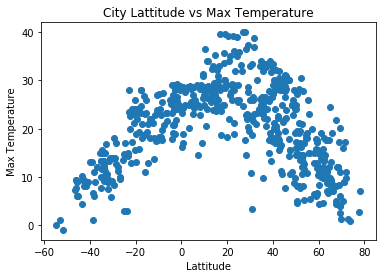

In [13]:
plt.scatter(lat, max_temp)
plt.xlabel('Lattitude')
plt.ylabel('Max Temperature')
plt.title('City Lattitude vs Max Temperature')

#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Lattitude vs Humidity')

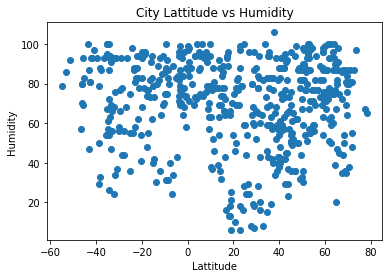

In [15]:
plt.scatter(lat, humidity)
plt.xlabel('Lattitude')
plt.ylabel('Humidity')
plt.title('City Lattitude vs Humidity')

#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Lattitude vs cloudiness')

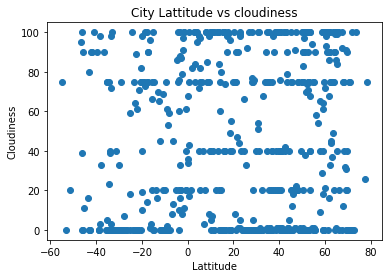

In [16]:
plt.scatter(lat, cloudiness)
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')
plt.title('City Lattitude vs Cloudiness')

#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Lattitude vs Windspeed')

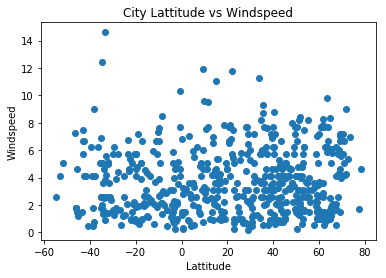

In [18]:
plt.scatter(lat, windspeed)
plt.xlabel('Lattitude')
plt.ylabel('Windspeed')
plt.title('City Lattitude vs Windspeed')